In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def plot(img, cmap = 'gray'):
    plt.imshow(img, cmap)
    plt.show()

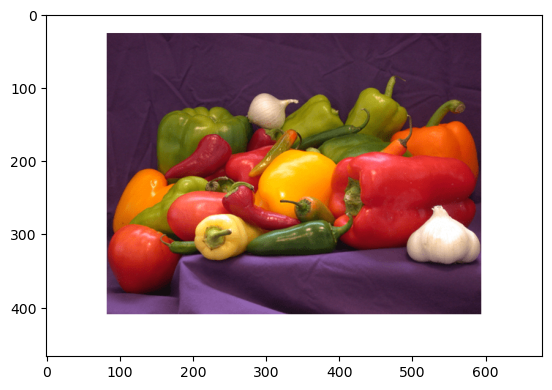

In [69]:
img = cv.imread('peppers.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Roberts 

$\nabla f = \displaystyle [ \frac{\partial}{\partial x}f, \frac{\partial}{\partial y}f ] $

$||\nabla f|| = \displaystyle \sqrt{ (\frac{\partial}{\partial x}f)^2 +  (\frac{\partial}{\partial y}f )^2}$

- Objetivo é fazer uma convolução em x e em y para achar os pontos cuja mudança é abrupta 

In [110]:
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gray = cv.GaussianBlur(img_gray, (5, 5), 0)
#img_gray = cv.medianBlur(img_gray, ksize= 5)

#kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
#kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)


# Aplique as convoluções para calcular as derivadas nas direções x e y
derivada_x = cv.filter2D(img_gray, -1, kernel_x)
derivada_y = cv.filter2D(img_gray, -1, kernel_y)

#Calculando a magnitude na borda
magnitude_borda = np.sqrt(derivada_x**2 + derivada_y**2)

#transformando para inteiros [0, 255] 
magnitude_borda = magnitude_borda.astype("uint8")



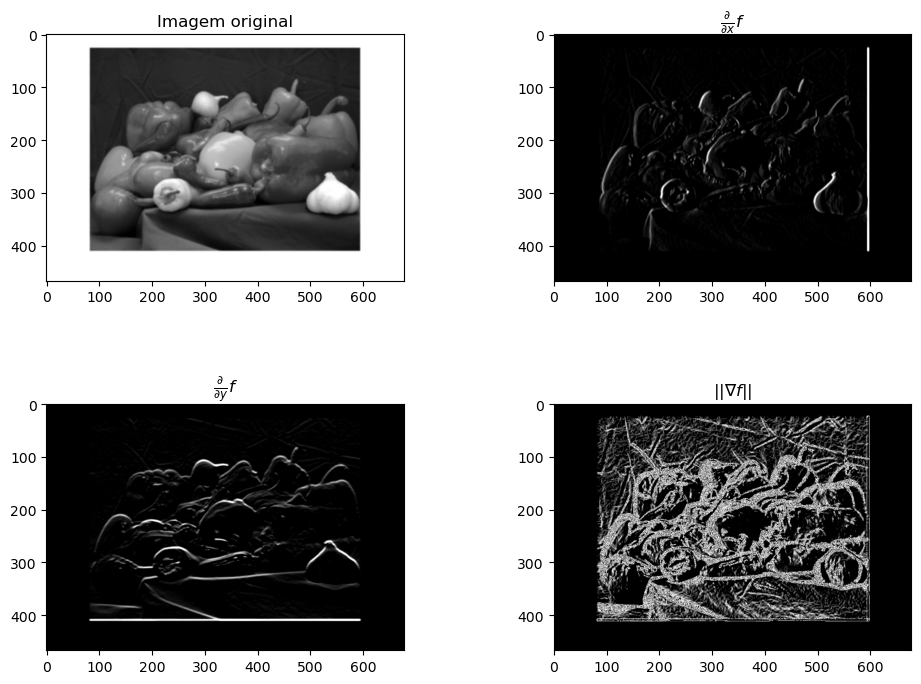

In [111]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
fig.subplots_adjust(hspace=0.5)

ax[0, 0].imshow(img_gray, cmap = 'gray')
ax[0, 0].set_title("Imagem original")

ax[0, 1].imshow(derivada_x, cmap = 'gray')
ax[0, 1].set_title(r"$\frac{\partial}{\partial x}f$")

ax[1, 0].imshow(derivada_y, cmap = 'gray')
ax[1, 0].set_title(r"$\frac{\partial}{\partial y}f$")

ax[1, 1].imshow(magnitude_borda, cmap = 'gray')
ax[1, 1].set_title(r"$||\nabla f||$")


plt.show()


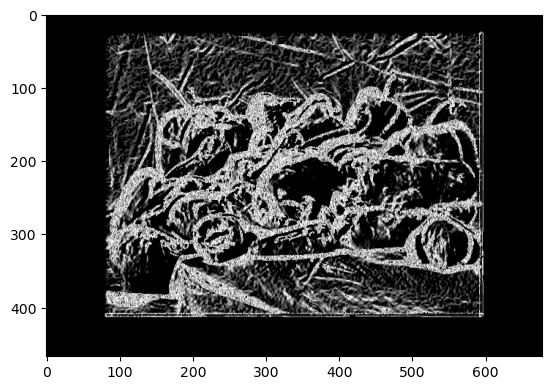

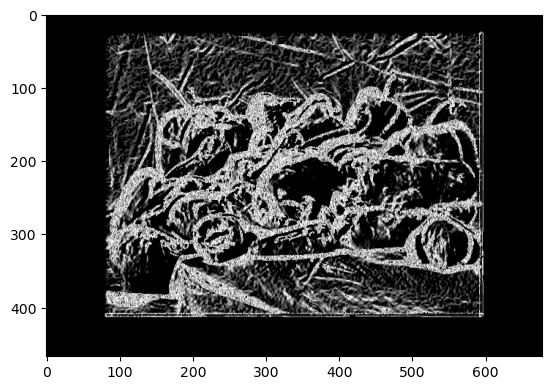

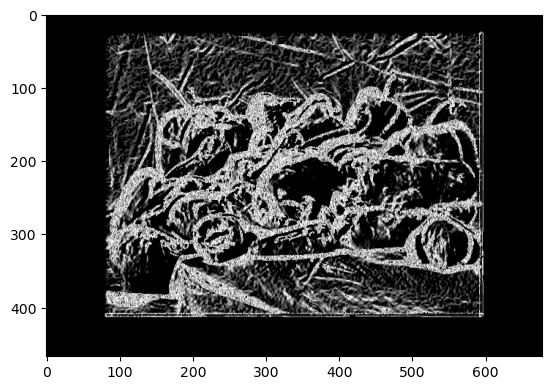

In [123]:
#Aplicando closing nas bordas

for i, val in enumerate([3, 5, 25]):
    bordas_finas = cv.morphologyEx(magnitude_borda, cv.MORPH_CLOSE, (val, val))
    plot(bordas_finas, 'gray')
    plt.show()

## Outros filtros: canny, sobel, laplaciano

- Já existem em OpenCV, não é preciso implementar 

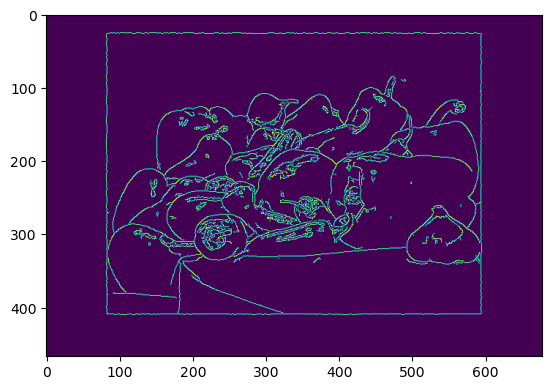

In [114]:
bordas_canny = cv.Canny(img, 100, 200)
plot(bordas_canny)

In [ ]:
bordas_canny = cv.Canny(img, 100, 200)
plot(bordas_canny)